In [1]:
import numpy as np
import pandas as pd 
import re
import string
import nltk
# nltk.download()
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2000137985\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\2000137985\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2000137985\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Loading the data set**

In [3]:
df = pd.read_csv(r"train.csv")
df.shape

(93686, 3)

In [4]:
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


# **EDA**

Looking on the dataset to understand the data better

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [6]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


In [7]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [8]:
df.head(5)

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [9]:
df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

We do have so many nulls in the sub_category

In [10]:
columns = ['category']
for column in columns:
    print(f"{column} - {df[column].value_counts()}")
    print("----------------------------------------------------")

category - category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
------------------------

**Category Distribution**

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Online Financial Fraud'),
  Text(1, 0, 'Online and Social Media Related Crime'),
  Text(2, 0, 'Any Other Cyber Crime'),
  Text(3, 0, 'Cyber Attack/ Dependent Crimes'),
  Text(4, 0, 'RapeGang Rape RGRSexually Abusive Content'),
  Text(5, 0, 'Sexually Obscene material'),
  Text(6, 0, 'Hacking  Damage to computercomputer system etc'),
  Text(7, 0, 'Sexually Explicit Act'),
  Text(8, 0, 'Cryptocurrency Crime'),
  Text(9, 0, 'Online Gambling  Betting'),
  Text(10, 0, 'Child Pornography CPChild Sexual Abuse Material CSAM'),
  Text(11, 0, 'Online Cyber Trafficking'),
  Text(12, 0, 'Cyber Terrorism'),
  Text(13, 0, 'Ransomware'),
  Text(14, 0, 'Report Unlawful Content')])

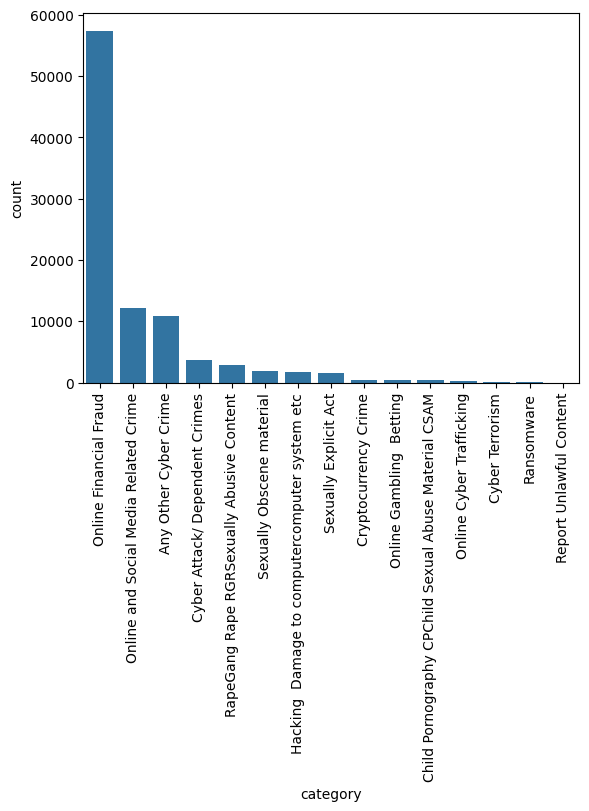

In [11]:

#if dataset is balanced or not
x=df['category'].value_counts()
print(x)
sns.barplot(x)
plt.xticks(rotation=90)

*Most of the complaints are in Online Financial Fraud*

**Lets take a look on the "crimeaditionalinfo" column**

In [12]:
# Getting WORD-COUNT of the crimeaditionalinfo
df['word_count'] = df['crimeaditionalinfo'].apply(lambda x: len(str(x).split()))

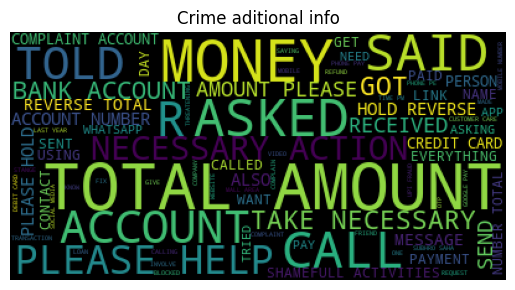

In [13]:
def cloud(text):
    try:
        text = text
    except Exception as e:
        text = str(text)
    wordcloud = WordCloud(stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Crime aditional info")
cloud(df['crimeaditionalinfo'].astype(str))

# Pre Processing

In [14]:
#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space.
    text = re.sub('/\\s+/gm', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text
text = "      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   "
text=preprocess(text)
print(text)  #text is a string

this is parthasarathy his team of good friend and this is for indiaai


In [15]:
#1. STOPWORD REMOVAL
def remove_stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=remove_stopword(text)
print(text)

parthasarathy team good friend indiaai


In [16]:
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

parthasarathi team good friend indiaai


In [17]:
#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

parthasarathi team good friend indiaai


In [18]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(remove_stopword(preprocess(string)))

finalpreprocess("      This is Parthasarathy & his team of 2 good friend!!        and this is for IndiaAI   ")

'parthasarathy team good friend indiaai'

In [19]:
from tqdm import tqdm
tqdm.pandas()


df['clean_text'] = df['crimeaditionalinfo'].progress_apply(lambda x:finalpreprocess(str(x)))

  0%|          | 0/93686 [00:00<?, ?it/s]

100%|██████████| 93686/93686 [1:46:50<00:00, 14.61it/s]  


In [20]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo', 'word_count',
       'clean_text'],
      dtype='object')

In [21]:
df.to_csv("category_and_cleandata.csv")

In [22]:
df = pd.read_csv("category_and_cleandata.csv")
df.shape

(93686, 6)

In [23]:
df.columns

Index(['Unnamed: 0', 'category', 'sub_category', 'crimeaditionalinfo',
       'word_count', 'clean_text'],
      dtype='object')

In [24]:
df_train = df[['category','clean_text']]
df_train

,category,clean_text
0,Online and Social Media Related Crime,continue receive random call abusive message w...
1,Online Financial Fraud,fraudster continuously message ask pay money s...
2,Online Gambling Betting,act like police demand money add section text ...
3,Online and Social Media Related Crime,apna job apply job interview telecalling resou...
4,Online Financial Fraud,receive call lady state send new phone vivo re...
...,...,...
93681,Online Financial Fraud,identity theft smishing sms fraud creditdebit ...
93682,Online Financial Fraud,receive call number ask phone pay cash back of...
93683,Online Financial Fraud,cyber stalk blackmail phonesmsvoip call victim...
93684,Online and Social Media Related Crime,call karke bola ki aapka lotary laga ha aru ac...


In [25]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"].astype(str),
                                                  df_train["category"].astype(str),
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [26]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


# Building ML models (Text-classification)

**LR (tf-idf)**

In [27]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

print("---Test Set Results---")
print("Accuracy with LR(tf-idf): {}".format(accuracy_score(y_val, y_predict))) 

print(classification_report(y_val,y_predict))
# print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

---Test Set Results---
Accuracy with LR(tf-idf): 0.7521613832853026


c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.39      0.26      0.31      2190
Child Pornography CPChild Sexual Abuse Material CSAM       0.72      0.35      0.47        74
                                Cryptocurrency Crime       0.68      0.53      0.60        90
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       766
                                     Cyber Terrorism       0.00      0.00      0.00        37
      Hacking  Damage to computercomputer system etc       0.49      0.28      0.36       355
                            Online Cyber Trafficking       0.00      0.00      0.00        28
                              Online Financial Fraud       0.82      0.93      0.87     11387
                            Online Gambling  Betting       0.80      0.04      0.09        89
               Online and Social Media Related Crime       

c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**NB (tf-idf)**

In [28]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print("---Test Set Results---")
print("Accuracy with nb(tf-idf): {}".format(accuracy_score(y_val, y_predict))) 

print(classification_report(y_val,y_predict))

---Test Set Results---
Accuracy with nb(tf-idf): 0.7098409648841926


c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.89      0.01      0.01      2190
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00        74
                                Cryptocurrency Crime       0.00      0.00      0.00        90
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       766
                                     Cyber Terrorism       0.00      0.00      0.00        37
      Hacking  Damage to computercomputer system etc       0.00      0.00      0.00       355
                            Online Cyber Trafficking       0.00      0.00      0.00        28
                              Online Financial Fraud       0.70      1.00      0.82     11387
                            Online Gambling  Betting       0.00      0.00      0.00        89
               Online and Social Media Related Crime       

c:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [29]:
df = pd.read_csv("category_and_cleandata.csv")
df_train = df[['category','clean_text']]
df_train

,category,clean_text
0,Online and Social Media Related Crime,continue receive random call abusive message w...
1,Online Financial Fraud,fraudster continuously message ask pay money s...
2,Online Gambling Betting,act like police demand money add section text ...
3,Online and Social Media Related Crime,apna job apply job interview telecalling resou...
4,Online Financial Fraud,receive call lady state send new phone vivo re...
...,...,...
93681,Online Financial Fraud,identity theft smishing sms fraud creditdebit ...
93682,Online Financial Fraud,receive call number ask phone pay cash back of...
93683,Online Financial Fraud,cyber stalk blackmail phonesmsvoip call victim...
93684,Online and Social Media Related Crime,call karke bola ki aapka lotary laga ha aru ac...


**FastText**

In [30]:
!pip install fasttext-wheel

In [31]:
df_train.iloc[:, 0] = df_train.iloc[:, 0].apply(lambda x: '__label__' + x)
df_train

,category,clean_text
0,__label__Online and Social Media Related Crime,continue receive random call abusive message w...
1,__label__Online Financial Fraud,fraudster continuously message ask pay money s...
2,__label__Online Gambling Betting,act like police demand money add section text ...
3,__label__Online and Social Media Related Crime,apna job apply job interview telecalling resou...
4,__label__Online Financial Fraud,receive call lady state send new phone vivo re...
...,...,...
93681,__label__Online Financial Fraud,identity theft smishing sms fraud creditdebit ...
93682,__label__Online Financial Fraud,receive call number ask phone pay cash back of...
93683,__label__Online Financial Fraud,cyber stalk blackmail phonesmsvoip call victim...
93684,__label__Online and Social Media Related Crime,call karke bola ki aapka lotary laga ha aru ac...


In [32]:
df_train['category_crime_info'] = df_train['category']+" "+df_train['clean_text']


C:\Users\2000137985\AppData\Local\Temp\ipykernel_20676\3657979087.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
print(f"{df_train['category_crime_info'][0]}")

__label__Online and Social Media Related Crime continue receive random call abusive message whatsapp someone add number unknown facebook group name girl still get call unknown number pls help sort issue soon possible thank


In [34]:
train, test = train_test_split(df_train,test_size=0.2)

In [35]:
print(df_train.shape)
print(train.shape)
print(test.shape)

(93686, 3)
(74948, 3)
(18738, 3)


In [36]:
train.to_csv("crime_info.train",columns=['category_crime_info'],index=False,header=False)
test.to_csv("crime_info.test",columns=['category_crime_info'],index=False,header=False)

In [37]:
import fasttext

In [38]:
model = fasttext.train_supervised(input="crime_info.train")


In [39]:
model.save_model("model_crime_trained.bin")

In [40]:
success_row, pression, recall = model.test("crime_info.test")

In [41]:
print(f"Total Test sample Rows    : {test.shape[0]}")
print(f"Total Test Success Rows   : {success_row}")
print(f"Test data's Precision     : {pression*100}")
print(f"Test data's Recall        : {recall*100}")

Total Test sample Rows    : 18738
Total Test Success Rows   : 18511
Test data's Precision     : 99.77310788180002
Test data's Recall        : 99.77310788180002
